In [1]:
# package import
import copy
import random
import operator
import os, math
import re, string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os import path
from PIL import Image
from stop_words import get_stop_words
from collections import Counter, defaultdict
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords 

import torch
import torch.utils.data as tud
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# read in the data 
def load_data(data_file):
    return pd.read_csv(data_file)

In [3]:
# analysis of the training set
train = load_data("train.csv")

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
# define 6 labels
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [6]:
# check number of instances in each labels 
for i in labels:
    print(train.groupby(i).size())

toxic
0    144277
1     15294
dtype: int64
severe_toxic
0    157976
1      1595
dtype: int64
obscene
0    151122
1      8449
dtype: int64
threat
0    159093
1       478
dtype: int64
insult
0    151694
1      7877
dtype: int64
identity_hate
0    158166
1      1405
dtype: int64


In [7]:
# compute length of commments
length = train.comment_text.str.len()

print('average length of comment: {:.2f}'.format(length.mean()))
print('max length of comment: {:.2f}'.format(length.max()))
print('standard deviation of comment: {:.2f}'.format(length.std()))

average length of comment: 394.07
max length of comment: 5000.00
standard deviation of comment: 590.72


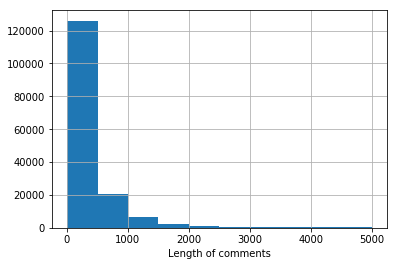

In [8]:
plt.hist(length)
plt.xlabel('Length of comments')   
plt.grid(True)
plt.savefig('all_length.jpg')
plt.show()

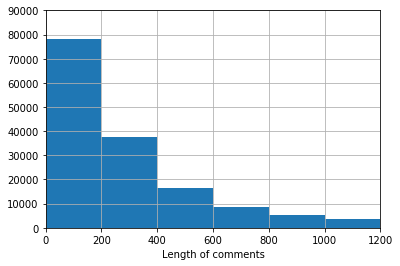

In [9]:
bins = [1,200,400,600,800,1000,1200]
plt.hist(length, bins=bins)
plt.xlabel('Length of comments')
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.savefig('all_length_part2.jpg')
plt.show()

In [10]:
# get english stop words 
stop_words = get_stop_words('english')
stop_words.append('')

# add single letter to the stop words set 
for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))
    
stopwords = set(stop_words)

In [11]:
# get sub category data
def subset(category):
    return train[train[category] == 1]

In [12]:
# length distribution for each sub category 
def length_hist(category):
    data = subset(category)
    length = data.comment_text.str.len()
    
    print('average length of {} comment: {:.2f}'.format(category, length.mean()))
    
    plt.hist(length)
    plt.xlabel('Length of comments')
    plt.ylabel('Number of comments')       
    plt.grid(True)
    plt.savefig(i+'.jpg')
    plt.show()

In [13]:
# word cloud for each sub category 
def word_cloud(category):
    
    data = subset(category)
    
    text = " ".join(comment for comment in data.comment_text)
    print ("There are {} words in the combination of {} review.".format(len(text), category))
    
    wordcloud = WordCloud(stopwords = stopwords, 
                          background_color = "white", 
                          max_font_size = 50, 
                          max_words = 200).generate(text)

    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.savefig(i+' word.jpg')
    plt.show()


average length of toxic comment: 295.25


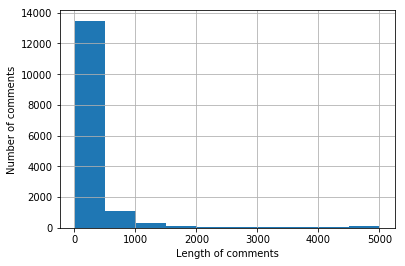

average length of severe_toxic comment: 453.64


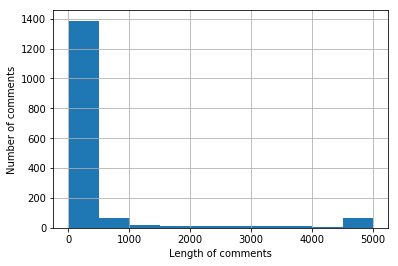

average length of obscene comment: 286.78


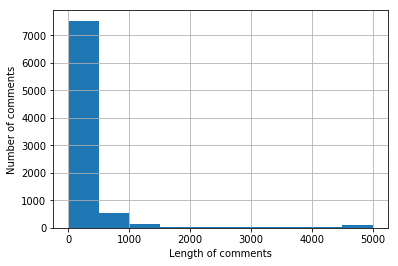

average length of threat comment: 307.74


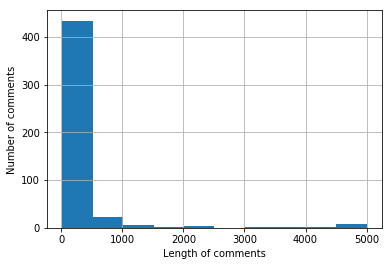

average length of insult comment: 277.28


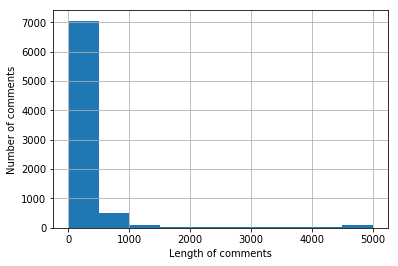

average length of identity_hate comment: 308.54


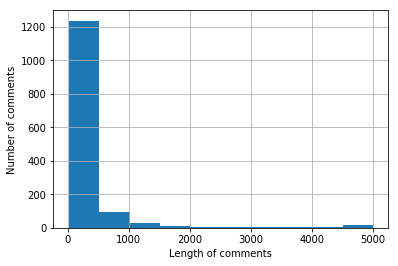

In [14]:
for i in labels:
    length_hist(i)

There are 4530786 words in the combination of toxic review.


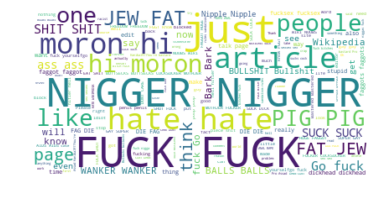

There are 725142 words in the combination of severe_toxic review.


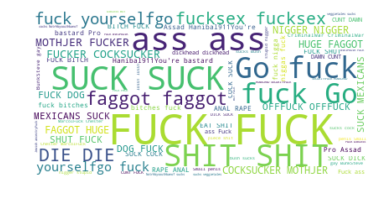

There are 2431493 words in the combination of obscene review.


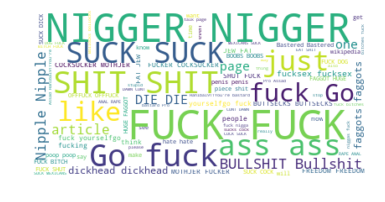

There are 147577 words in the combination of threat review.


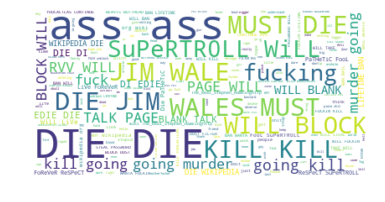

There are 2192048 words in the combination of insult review.


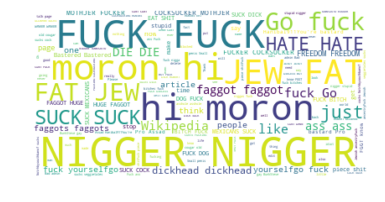

There are 434904 words in the combination of identity_hate review.


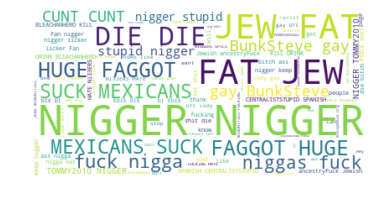

In [15]:
for i in labels:
    word_cloud(i)